In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df =pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
import torch 
import seaborn as sns 


In [6]:
X= df.drop('Outcome',axis=1).values ##independent features
y=df['Outcome'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [17]:
### Libraries from Pytorch
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [18]:
#########CREATING TENSORS

X_train =torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)



In [19]:
#Creating model with Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x
    
    

In [20]:
### INSTANTIATE MY ANN MODEL
torch.manual_seed(20)
model=ANN_Model()

In [21]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [22]:
##BACKWARD PROPAGATION

#Define loss func and define optimizer 

loss_function = nn.CrossEntropyLoss()
optimizer =torch.optim.Adam(model.parameters(),lr=0.01)



In [23]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    
    if i%10==1:
        print("epoch {} and loss{}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1 and loss3.45721173286438
epoch 11 and loss0.8019213080406189
epoch 21 and loss0.6090322732925415
epoch 31 and loss0.5917770266532898
epoch 41 and loss0.5679706335067749
epoch 51 and loss0.552903950214386
epoch 61 and loss0.5410096049308777
epoch 71 and loss0.5310390591621399
epoch 81 and loss0.5220361351966858
epoch 91 and loss0.5135970711708069
epoch 101 and loss0.506125271320343
epoch 111 and loss0.4983413517475128
epoch 121 and loss0.49605461955070496
epoch 131 and loss0.4828636944293976
epoch 141 and loss0.47560372948646545
epoch 151 and loss0.47992396354675293
epoch 161 and loss0.47929075360298157
epoch 171 and loss0.4649999737739563
epoch 181 and loss0.45820125937461853
epoch 191 and loss0.45270800590515137
epoch 201 and loss0.4457748234272003
epoch 211 and loss0.43963250517845154
epoch 221 and loss0.4389266073703766
epoch 231 and loss0.4437078833580017
epoch 241 and loss0.4295613169670105
epoch 251 and loss0.42510986328125
epoch 261 and loss0.4227140247821808
epoch 271 a

In [24]:
##plotting the loss func

import matplotlib.pyplot as plt 
%matplotlib inline 


Text(0.5, 0, 'epoc')

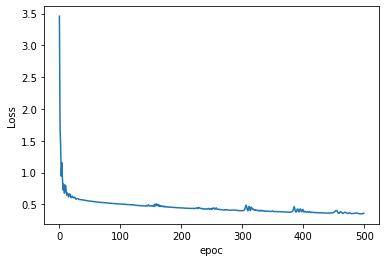

In [25]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('epoc')

In [26]:
#### prediciton in X_test data
prediction =[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        prediction.append(y_pred.argmax().item())


In [27]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction)
cm

array([[85, 22],
       [11, 36]])

Text(69.0, 0.5, 'Predicted Values')

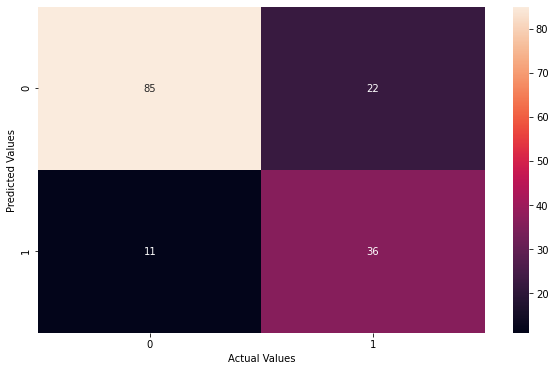

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')



In [29]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,prediction)
score


0.7857142857142857

In [30]:
torch.save(model,'diabetes.pt')
model= torch.load('diabetes.pt')


In [31]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [32]:
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [33]:
lst1=[6.0, 138.0, 722.0, 33.0, 40.0, 33.6, 0.627, 50.0]

In [34]:
new_data=torch.tensor(lst1)


In [35]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())
    

tensor([ 129.5626, -117.2813])
0
